In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
%matplotlib inline

2024-05-21 09:12:10.109881: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 09:12:10.110024: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 09:12:10.255412: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
#Number of training samples
len(x_train)

60000

In [4]:
#Number of testing samples
len(x_test)

10000

In [5]:
#Shape of the image
x_train[0].shape

(28, 28)

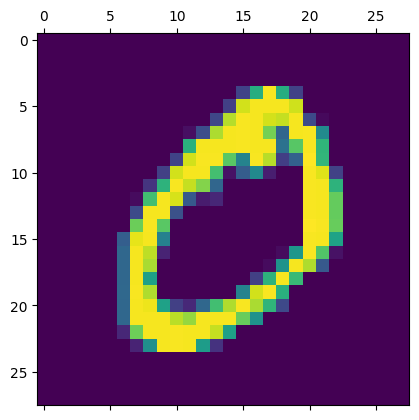

In [6]:
# Sample Visualization
plt.matshow(x_train[1])

In [7]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [8]:
x_train_flattened.shape

(60000, 784)

In [9]:
x_test_flattened.shape

(10000, 784)

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

x_train_flattened = scaler.fit_transform(x_train_flattened)
x_test_flattened = scaler.fit_transform(x_test_flattened)

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8153 - loss: 0.7170
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9137 - loss: 0.3091
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9213 - loss: 0.2827
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9218 - loss: 0.2773
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9249 - loss: 0.2668


In [12]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.9146 - loss: 0.3023


[0.2673672139644623, 0.925599992275238]

In [13]:
y_pred = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


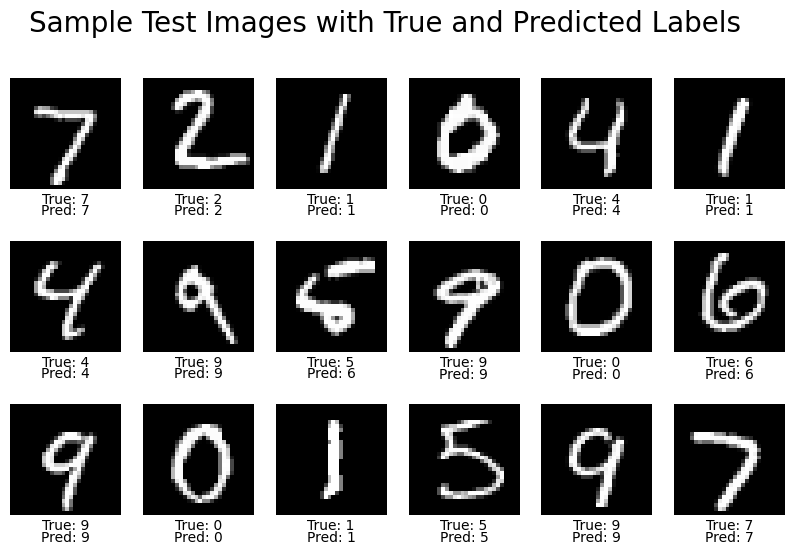

In [17]:
label_names = {i: str(i) for i in range(10)}

# Visualize sample images along with true and predicted labels
fig, axes = plt.subplots(3, 6, figsize=(10, 6))
fig.text(0.5, 0.95, "Sample Test Images with True and Predicted Labels", horizontalalignment='center', verticalalignment='center', fontsize=20)

for i, ax in enumerate(axes.flat):
    # Display the test image
    ax.imshow(x_test[i].reshape((28, 28)), cmap='gray')
    
    # True label
    true_label = label_names[y_test[i]]  
    # Predicted label
    pred_label = label_names[np.argmax(y_pred[i])]
    
    # Display true and predicted labels
    ax.text(0.5, -0.1, f"True: {true_label}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.text(0.5, -0.2, f"Pred: {pred_label}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    
    ax.axis('off')

plt.show()